# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 초기 가설

- 온도에 따라 따릉이 대여수에 영향이 있을 것이다
- 공기질에 따라 따릉이 대여수에 영향이 있을 것이다
- 요일 별로 따릉이 대여수에 영향이 있을 것이다
- 강우 여부에 따라 따릉이 대여수에 영향이 있을 것이다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [148]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv('./sbikedata.csv') # 날씨 데이터
data.shape

(5827, 11)

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head()


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.describe()


,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['date'].value_counts()

date
2021-08-01    24
2021-09-12    24
2021-08-31    24
2021-09-01    24
2021-09-02    24
              ..
2021-04-01    23
2021-05-21    23
2021-09-21    22
2021-04-30    22
2021-11-30     1
Name: count, Length: 244, dtype: int64

In [80]:
# 11월 30일 정보가 1 이므로 제외해 준다
data= data.loc[data['date']!='2021-11-30',:]
data['date']

0       2021-04-01
1       2021-04-01
2       2021-04-01
3       2021-04-01
4       2021-04-01
           ...    
5821    2021-11-29
5822    2021-11-29
5823    2021-11-29
5824    2021-11-29
5825    2021-11-29
Name: date, Length: 5826, dtype: object

In [81]:
# 시간이 24가 아닌 경우는 뭐지? -> 1~2개 결측이며 시간당 평균 낼 것이므로 그냥 크리티컬하지 않을것 같음 
data['date'] = pd.to_datetime(data['date'])

## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석

#### 1) Feature1 : hour

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].value_counts()


hour
1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: count, dtype: int64

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

변수의 결측치 존재 여부 및 조치방안

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].info() # 결측치 없음, 다만 시간을 건너뛴 경우 있음


<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


변수의 기초 통계량 확인

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].describe()


count    5826.000000
mean       11.508582
std         6.920915
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

변수의 분포 확인
* kdeplot 활용

<Axes: xlabel='hour', ylabel='Count'>

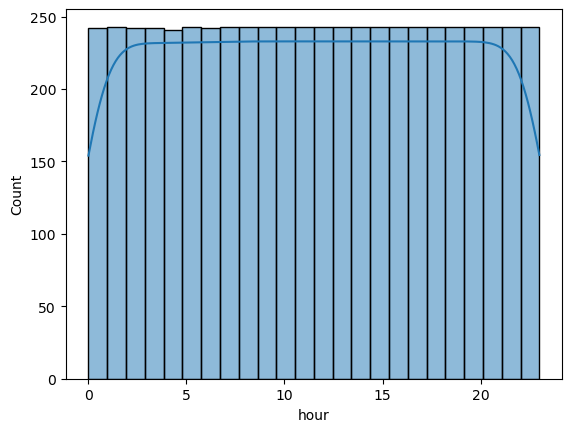

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(x='hour', data=data, kde=True, bins =24)b

* 각 시간 단위 관측치 개수는 거의 일정함

위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

#### 2) Feature2 : temperature

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'] # 수치형

0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5821    10.3
5822     9.3
5823     8.4
5824     8.6
5825     8.2
Name: temperature, Length: 5826, dtype: float64

변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'].info() 


<class 'pandas.core.series.Series'>
Index: 5826 entries, 0 to 5825
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5826 non-null   float64
dtypes: float64(1)
memory usage: 91.0 KB


변수의 결측치 존재 여부 및 조치방안
* 결측치 없음

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'].describe()


count    5826.000000
mean       19.378768
std         7.500709
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

변수의 기초 통계량 확인
* 평균 온도는 19도 최저 -3.5 최고 36도

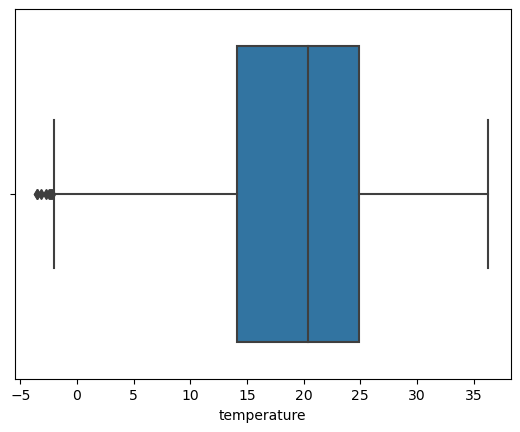

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# boxplot
sns.boxplot(x='temperature', data= data)
plt.show()


변수의 분포 확인
* 몇몇 이상치들 존재

In [99]:
# iqr 구하기
Q1 = data['temperature'].quantile(0.25)
Q3 = data['temperature'].quantile(0.75)
iqr = Q3-Q1
print(f'iqr : {iqr}')

# 이상치 제거
low_bound = Q1 -  iqr*1.5
print(f'이전 shape : {data.shape}')
data1 = data.loc[data['temperature']>=low_bound]
print(f'이후 shape : {data1.shape}')

iqr : 10.799999999999999
이전 shape : (5826, 11)
이후 shape : (5818, 11)


위 정보로 부터 파악한 내용 정리


#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
rain = data1['precipitation']
rain

0       0
1       0
2       0
3       0
4       0
       ..
5821    0
5822    0
5823    0
5824    0
5825    0
Name: precipitation, Length: 5818, dtype: int64

변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형 데이터


In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
rain.info() 


<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5818 non-null   int64
dtypes: int64(1)
memory usage: 90.9 KB


변수의 결측치 존재 여부 및 조치 방안
* no na

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
rain.describe()

count    5818.000000
mean        0.075627
std         0.264424
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

변수의 기초 통계량 확인
* 평균 값이 0.07 을 보면 비가 안 오는 날이 93% 이다

<Axes: xlabel='precipitation', ylabel='count'>

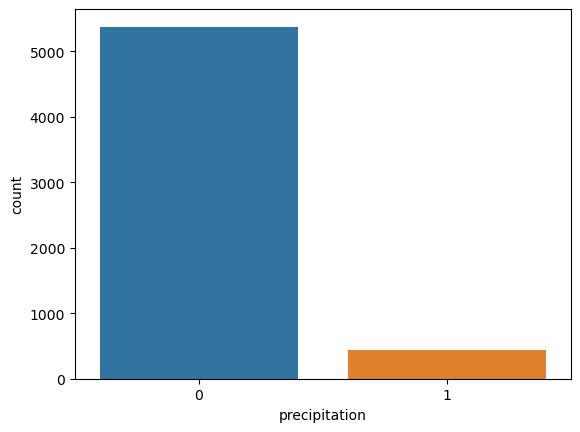

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 강우여부(범주) -> 대여량(수치) 
# barplot ( countplot)
sns.countplot(x='precipitation', data=data)


In [142]:
data.loc[data['precipitation']==0]['count'].mean()

229.4845896769402

변수의 분포 확인
* 예상대로 비가 안 오는날이 압도적으로 많다

위 정보로 부터 파악한 내용 정리
* 비가 오는 날의 데이터가 상대적으로 부족해서 신뢰성이 떨어질 수는 있다.


#### 4) Feature4 : windspeed

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['windspeed']


0       1.4
1       2.1
2       3.4
3       3.1
4       2.9
       ... 
5821    1.2
5822    0.3
5823    2.0
5824    1.9
5825    2.1
Name: windspeed, Length: 5818, dtype: float64

변수가 수치형인지 범주형인지
* 수치형

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['windspeed'].info()


<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5818 non-null   float64
dtypes: float64(1)
memory usage: 90.9 KB


변수의 결측치 존재 여부 및 조치방안
* 결측치 없음

In [86]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['windspeed'].describe()


count    5818.000000
mean        2.237693
std         1.055039
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

변수의 기초 통계량 확인
* 거의 대칭성을 보이는 정규 분포 

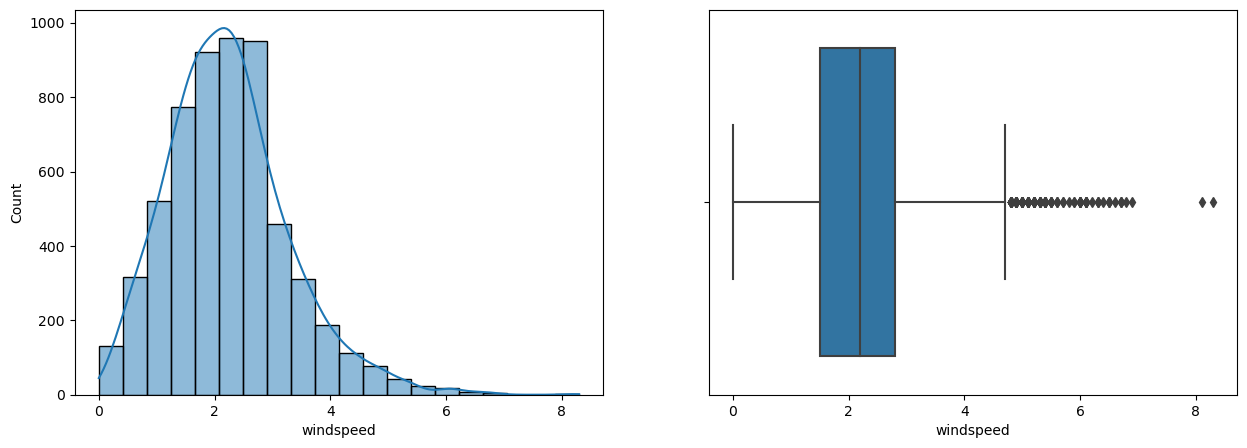

In [87]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(x ='windspeed', data= data1, kde=True, bins=20)

plt.subplot(1,2,2)
sns.boxplot(x='windspeed', data= data1)

plt.show()

변수의 분포 확인

위 정보로 부터 파악한 내용 정리
* 풍속은 0~4의 값을 가지는 정규분포 양상을 보인다

#### 5) Feature5 : humidity

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 6) Feature6 : visibility

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 7) Feature7 : ozone

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

In [149]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

변수가 수치형인지 범주형인지


<Axes: xlabel='ozone', ylabel='Count'>

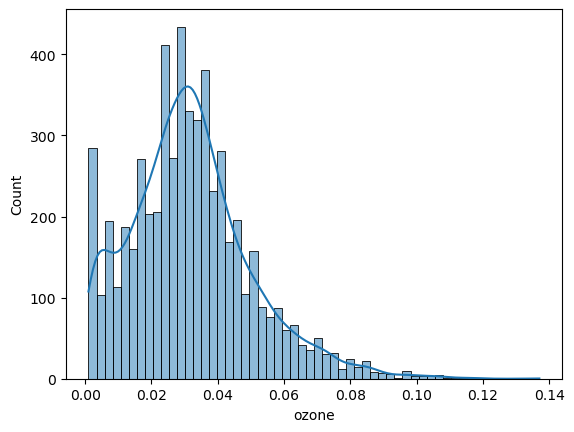

In [146]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.histplot(x='ozone', data=data, kde=True)

변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 8) Feature8 : PM10

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도

In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['PM10']


0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5821    57.0
5822    74.0
5823    65.0
5824    51.0
5825    43.0
Name: PM10, Length: 5818, dtype: float64

변수가 수치형인지 범주형인지
* 수치형


In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data1['PM10'].info())

# 결측치 확인
display(data1.loc[data['PM10'].isna() == True, 'PM10']) # 102 개

# 결측치 처리, 앞 뒤 시간 평균
# 선형 보간 interpolate
data1['PM10'] = data1['PM10'].interpolate()
data1['PM10'].info()

<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5716 non-null   float64
dtypes: float64(1)
memory usage: 90.9 KB
None


274    NaN
275    NaN
276    NaN
538    NaN
539    NaN
        ..
5147   NaN
5503   NaN
5504   NaN
5505   NaN
5506   NaN
Name: PM10, Length: 102, dtype: float64

<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5818 non-null   float64
dtypes: float64(1)
memory usage: 90.9 KB


C:\Users\User\AppData\Local\Temp\ipykernel_24500\117970420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PM10'] = data1['PM10'].interpolate()


변수의 결측치 존재 여부 및 조치방안
* 102개 결측치 선형 보간

In [76]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['PM10'].describe()


count    5818.000000
mean       31.843933
std        42.681909
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

변수의 기초 통계량 확인

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 이상치 제거
Q3 = data['PM10'].quantile(0.75)
Q1 = data['PM10'].quantile(0.25)
iqr = Q3 - Q1
upper_bound = Q3 + 1.5*iqr
upper_bound

68.5

In [94]:
data2 = data1.loc[data['PM10']<upper_bound, :] 
data2.shape

(5443, 11)

변수의 분포 확인

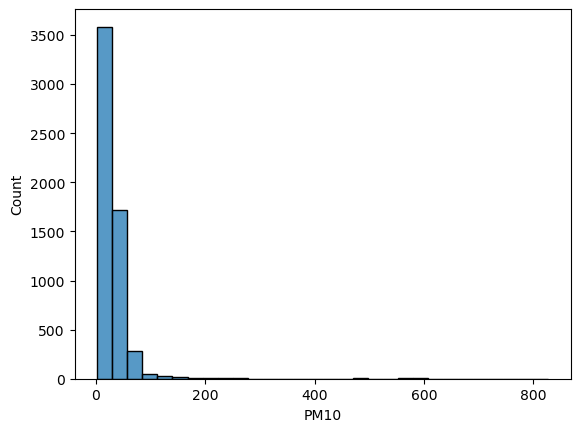

<Axes: xlabel='PM10'>

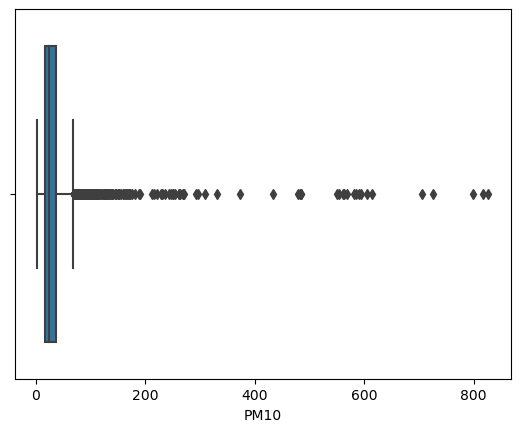

In [140]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(x='PM10', data=data, bins=30)
plt.show()

sns.boxplot(x='PM10', data=data)

위 정보로 부터 파악한 내용 정리


#### 9) Feature9 : PM2.5

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['PM2.5']


0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5821    44.0
5822    58.0
5823    56.0
5824    41.0
5825    35.0
Name: PM2.5, Length: 5818, dtype: float64

변수가 수치형인지 범주형인지
* 수치형

In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data1['PM2.5'].info())

# # 선형 보간
data1['PM2.5'] = data1['PM2.5'].interpolate()
data1['PM2.5'].info()

<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5818 non-null   float64
dtypes: float64(1)
memory usage: 90.9 KB
None
<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5818 non-null   float64
dtypes: float64(1)
memory usage: 90.9 KB


C:\Users\User\AppData\Local\Temp\ipykernel_24500\3453058704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PM2.5'] = data1['PM2.5'].interpolate()


변수의 결측치 존재 여부 및 조치방안
* 결측치 선형보간

In [106]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_copy = data1.copy()
data_copy['PM2.5'].describe()

count    5818.000000
mean       15.643692
std        13.795854
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

변수의 기초 통계량 확인

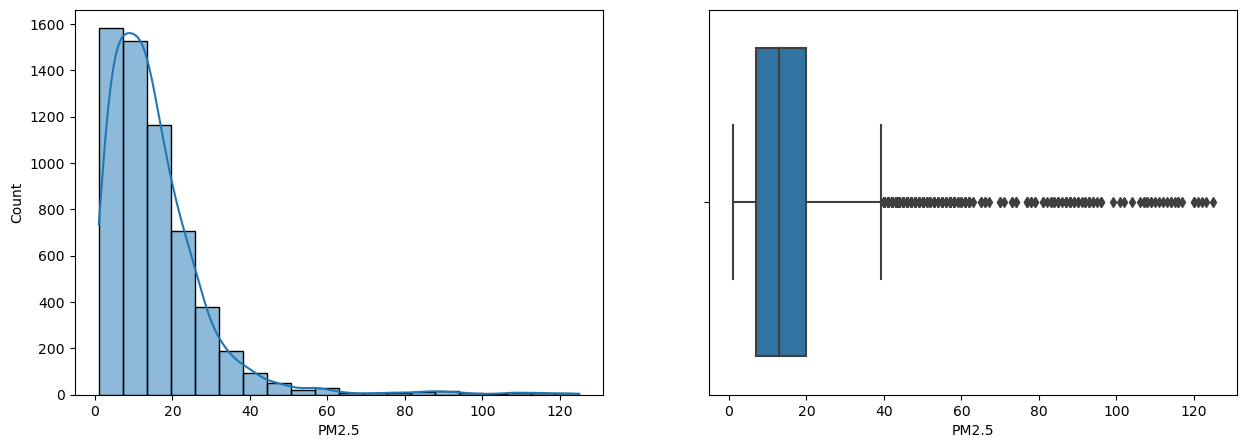

In [109]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='PM2.5', data= data_copy, kde=True, bins =20)

plt.subplot(1,2,2)
sns.boxplot(x='PM2.5', data=data_copy)

plt.show()

변수의 분포 확인
* 대부분 30 아래로 초미세먼지는 좋음 수준이었다

위 정보로 부터 파악한 내용 정리


In [122]:
# 초미세먼지 좋음 ~15 보통 ~35 나쁨 ~75 매우 나쁨76~
bins = [0,15,35,75, np.inf]
names = ['좋음', '보통', '나쁨', '매우나쁨']
data_copy['초미세먼지'] = pd.cut(data_copy['PM2.5'], bins=bins, labels = names)
data_copy.tail()

# 미세먼지 30 80 150
bins2 = [0, 30, 80, 150, np.inf]
data_copy['미세먼지'] = pd.cut(data_copy['PM10'], bins = bins2, labels = names)

# 미세먼지 변수 통합, 
data_copy['PM10+2*PM2.5'] = data_copy['PM10'] +2*data_copy['PM2.5']

# 공기질
bins = [0, 60, 160, 300, np.inf]
data_copy['공기질'] = pd.cut(data_copy['PM10+2*PM2.5'], bins = bins, labels = names)

data_copy.drop(columns = ['PM10+2*PM2.5', '초미세먼지', '미세먼지'],inplace=True)
data_copy.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,공기질
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,보통
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,보통
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,좋음
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,좋음
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,좋음


#### 10) Count (Target)

In [129]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_copy['count']


0        46
1        40
2        31
3        12
4        30
       ... 
5821    332
5822    273
5823    228
5824    215
5825    125
Name: count, Length: 5818, dtype: int64

변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

In [130]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_copy['count'].info()


<class 'pandas.core.series.Series'>
Index: 5818 entries, 0 to 5825
Series name: count
Non-Null Count  Dtype
--------------  -----
5818 non-null   int64
dtypes: int64(1)
memory usage: 90.9 KB


변수가 수치형인지 범주형인지
* 수치형

변수의 결측치 존재 여부 및 조치 방안
* 결측치 없음

In [132]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_copy['count'].describe()


count    5818.000000
mean      215.300619
std       186.024601
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

변수의 기초 통계량 확인

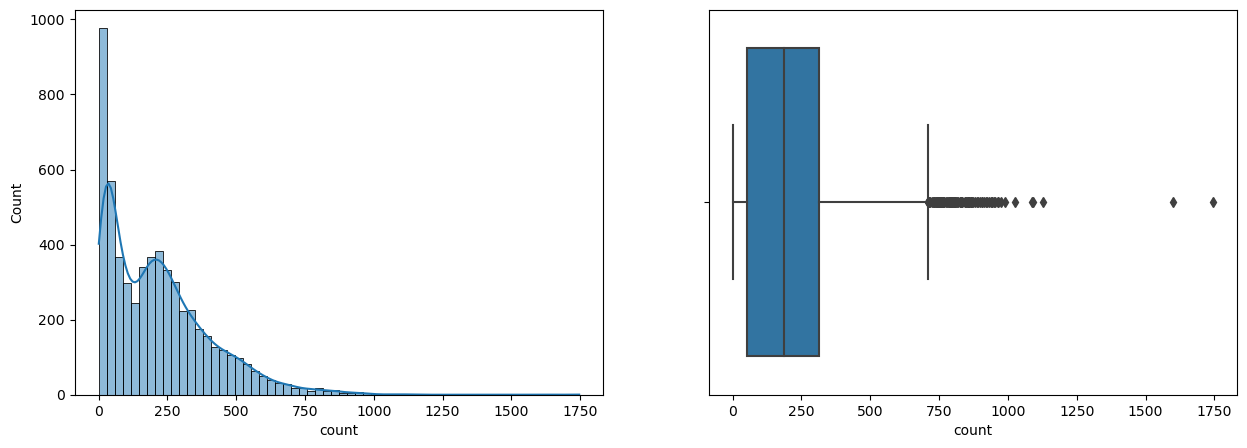

In [134]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='count', data =data_copy, kde=True)

plt.subplot(1,2,2)
sns.boxplot(x='count', data=data_copy)

plt.show()

변수의 분포 확인
* 대여량이 거의 없는 경우가 많다 -> 이유가 뭘까?
* 시간대별 빌리는 차이도 있을 것 같다 -> 새벽 시간 제외

In [136]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data_copy.to_csv('./ddarueng.csv')

위 정보로 부터 파악한 내용 정리


In [135]:
data_copy.groupby('hour')['count'].sum()

hour
0      22279
1      13818
2       8524
3       5701
4       4192
5       6844
6      16247
7      33336
8      61235
9      45064
10     41529
11     51566
12     58532
13     58949
14     62482
15     69719
16     80693
17    108303
18    143475
19    100951
20     84646
21     78920
22     63355
23     32259
Name: count, dtype: int64